In [1]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

In [8]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [9]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-11-21 13:28:29,971] A new study created in memory with name: no-name-57be2a06-ba8a-49b3-bd31-60c9ac837a1b


[I 2024-11-21 13:28:30,228] Trial 0 finished with value: 0.4658631883959173 and parameters: {'booster': 'dart', 'lambda': 0.00020946239405055526, 'alpha': 2.931839905701015e-07, 'max_depth': 2, 'eta': 0.0007124472241621711, 'gamma': 4.736633630906856e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.862520862795321e-05, 'skip_drop': 0.06236069160985634}. Best is trial 0 with value: 0.4658631883959173.
[I 2024-11-21 13:28:30,410] Trial 1 finished with value: 0.49872960448032255 and parameters: {'booster': 'dart', 'lambda': 0.1288340817319894, 'alpha': 1.1235632342377279e-07, 'max_depth': 1, 'eta': 1.821243511079476e-07, 'gamma': 6.347411071433252e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0009829776170041798, 'skip_drop': 0.000488742869426689}. Best is trial 1 with value: 0.49872960448032255.


New best score: 0.466
Best model performance:
Accuracy: 0.825 ± 0.052
F1 Macro: 0.687 ± 0.052
F1 Weighted: 0.822 ± 0.032
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099379), 'f1_weighted': np.float64(0.8099378881987577)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.7333333333333333, 'f1_macro': np.float64(0.5833333333333334), 'f1_weighted': np.float64(0.7666666666666667)}, {'acc': 0.8571428571428571, 'f1_macro': np.float64(0.7083333333333333), 'f1_weighted': np.float64(0.8571428571428571)}]
New best score: 0.499
Best model performance:
Accuracy: 0.866 ± 0.041
F1 Macro: 0.684 ± 0.116
F1 Weighted: 0.842 ± 0.041
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099

[I 2024-11-21 13:28:30,616] Trial 2 finished with value: 0.4658631883959173 and parameters: {'booster': 'gbtree', 'lambda': 0.0001737188475340575, 'alpha': 2.9489300393745372e-05, 'max_depth': 2, 'eta': 0.0019420735565910626, 'gamma': 5.777673293651609e-06, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.49872960448032255.
[I 2024-11-21 13:28:30,908] Trial 3 finished with value: 0.4960685702412563 and parameters: {'booster': 'dart', 'lambda': 1.1656035339114286e-05, 'alpha': 2.2791050176478337e-07, 'max_depth': 8, 'eta': 4.264056178542249e-08, 'gamma': 2.3336981252716918e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.10713832605221774, 'skip_drop': 8.664426733692383e-07}. Best is trial 1 with value: 0.49872960448032255.
[I 2024-11-21 13:28:31,150] Trial 4 finished with value: 0.4783761094438505 and parameters: {'booster': 'dart', 'lambda': 0.39920282661637113, 'alpha': 0.0018966496350241824, 'max_depth': 8, 'eta': 5.425332

New best score: 0.704
Best model performance:
Accuracy: 0.920 ± 0.050
F1 Macro: 0.840 ± 0.097
F1 Weighted: 0.911 ± 0.056
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.8148148148148148), 'f1_weighted': np.float64(0.9234567901234567)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-21 13:28:32,534] Trial 11 finished with value: 0.6631836987350632 and parameters: {'booster': 'gblinear', 'lambda': 0.009831756651581217, 'alpha': 0.002300721495043437}. Best is trial 9 with value: 0.7039337563024542.
[I 2024-11-21 13:28:32,684] Trial 12 finished with value: 0.6631836987350632 and parameters: {'booster': 'gblinear', 'lambda': 0.004771217894690999, 'alpha': 0.002218900707843814}. Best is trial 9 with value: 0.7039337563024542.
[I 2024-11-21 13:28:32,845] Trial 13 finished with value: 0.6024938699160863 and parameters: {'booster': 'gblinear', 'lambda': 0.7566484736115248, 'alpha': 0.04182410952298445}. Best is trial 9 with value: 0.7039337563024542.
[I 2024-11-21 13:28:32,994] Trial 14 finished with value: 0.6969195446998454 and parameters: {'booster': 'gblinear', 'lambda': 0.005232608058103694, 'alpha': 0.0003413665926887815}. Best is trial 9 with value: 0.7039337563024542.
[I 2024-11-21 13:28:33,142] Trial 15 finished with value: 0.6631836987350632 and param

New best score: 0.736
Best model performance:
Accuracy: 0.919 ± 0.026
F1 Macro: 0.870 ± 0.020
F1 Weighted: 0.921 ± 0.022
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.8295454545454546), 'f1_weighted': np.float64(0.8772727272727272)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.9386666666666666)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-21 13:28:33,793] Trial 19 finished with value: 0.7362098798554709 and parameters: {'booster': 'gblinear', 'lambda': 1.8963116715789917e-08, 'alpha': 1.2551193161420748e-06}. Best is trial 17 with value: 0.7362098798554709.
[I 2024-11-21 13:28:33,950] Trial 20 finished with value: 0.7022499721864208 and parameters: {'booster': 'gblinear', 'lambda': 1.610891089130947e-08, 'alpha': 1.822875379934367e-06}. Best is trial 17 with value: 0.7362098798554709.
[I 2024-11-21 13:28:34,120] Trial 21 finished with value: 0.7022499721864208 and parameters: {'booster': 'gblinear', 'lambda': 1.628785970505309e-07, 'alpha': 9.631268187811728e-07}. Best is trial 17 with value: 0.7362098798554709.
[I 2024-11-21 13:28:34,269] Trial 22 finished with value: 0.6022120594382817 and parameters: {'booster': 'gblinear', 'lambda': 1.6405830528305252e-07, 'alpha': 4.0036594896822295e-05}. Best is trial 17 with value: 0.7362098798554709.
[I 2024-11-21 13:28:34,421] Trial 23 finished with value: 0.66843106

New best score: 0.806
Best model performance:
Accuracy: 0.946 ± 0.027
F1 Macro: 0.904 ± 0.048
F1 Weighted: 0.944 ± 0.028
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-21 13:28:35,680] Trial 30 finished with value: 0.6192439604955923 and parameters: {'booster': 'dart', 'lambda': 0.0009750051525661867, 'alpha': 5.788410642362854e-07, 'max_depth': 4, 'eta': 0.9224252933560385, 'gamma': 0.012075494287522496, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.0110411240923255e-08, 'skip_drop': 0.5044006645294585}. Best is trial 29 with value: 0.806425114231087.
[I 2024-11-21 13:28:35,834] Trial 31 finished with value: 0.7581635155117249 and parameters: {'booster': 'gblinear', 'lambda': 0.0714645235171536, 'alpha': 3.1738046924899053e-06}. Best is trial 29 with value: 0.806425114231087.
[I 2024-11-21 13:28:36,016] Trial 32 finished with value: 0.7039337563024542 and parameters: {'booster': 'gblinear', 'lambda': 0.2458893089236643, 'alpha': 3.863212732253632e-06}. Best is trial 29 with value: 0.806425114231087.
[I 2024-11-21 13:28:36,164] Trial 33 finished with value: 0.806425114231087 and parameter

New best score: 0.852
Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-21 13:28:39,046] Trial 48 finished with value: 0.7948768203234714 and parameters: {'booster': 'gblinear', 'lambda': 0.0119842915962699, 'alpha': 5.1495331441344904e-08}. Best is trial 46 with value: 0.8523939840000002.
[I 2024-11-21 13:28:39,220] Trial 49 finished with value: 0.777724765025171 and parameters: {'booster': 'gblinear', 'lambda': 7.537102962989045e-05, 'alpha': 1.3273500090636459e-08}. Best is trial 46 with value: 0.8523939840000002.
[I 2024-11-21 13:28:39,452] Trial 50 finished with value: 0.4685618258608611 and parameters: {'booster': 'dart', 'lambda': 0.0007170293927873643, 'alpha': 6.158493287737781e-07, 'max_depth': 1, 'eta': 3.8358922027641256e-07, 'gamma': 0.05203845406525254, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 9.185481821776139e-07, 'skip_drop': 2.7808293031543915e-08}. Best is trial 46 with value: 0.8523939840000002.
[I 2024-11-21 13:28:39,598] Trial 51 finished with value: 0.806425114231087 a

Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.003962049603247817, 'alpha': 5.043886877046773e-07}


In [10]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.06682561337947845, -0.06661781668663025], 'ENSG00000278588': [0.04553341865539551, -0.04268893599510193], 'ENSG00000120594': [0.04250079393386841, -0.035555459558963776], 'ENSG00000121797': [-0.05176321417093277, 0.053131453692913055], 'ENSG00000140398': [0.052620042115449905, -0.0540243461728096], 'ENSG00000168062': [-0.06629494577646255, 0.06444957107305527], 'ENSG00000174307': [-0.07112377136945724, 0.06815408170223236], 'ENSG00000184897': [0.04106151685118675, -0.0425138846039772], 'ENSG00000105497': [-0.0484677292406559, 0.052502356469631195], 'ENSG00000113552': [-0.06527728587388992, 0.0637412816286087], 'ENSG00000188536': [-0.06168542802333832, 0.05623084679245949], 'ENSG00000181004': [-0.045379508286714554, 0.047502998262643814], 'ENSG00000143590': [-0.0645076185464859, 0.0687268078327179], 'ENSG00000006534': [-0.05433368310332298, 0.05764872580766678], 'ENSG000001

In [11]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

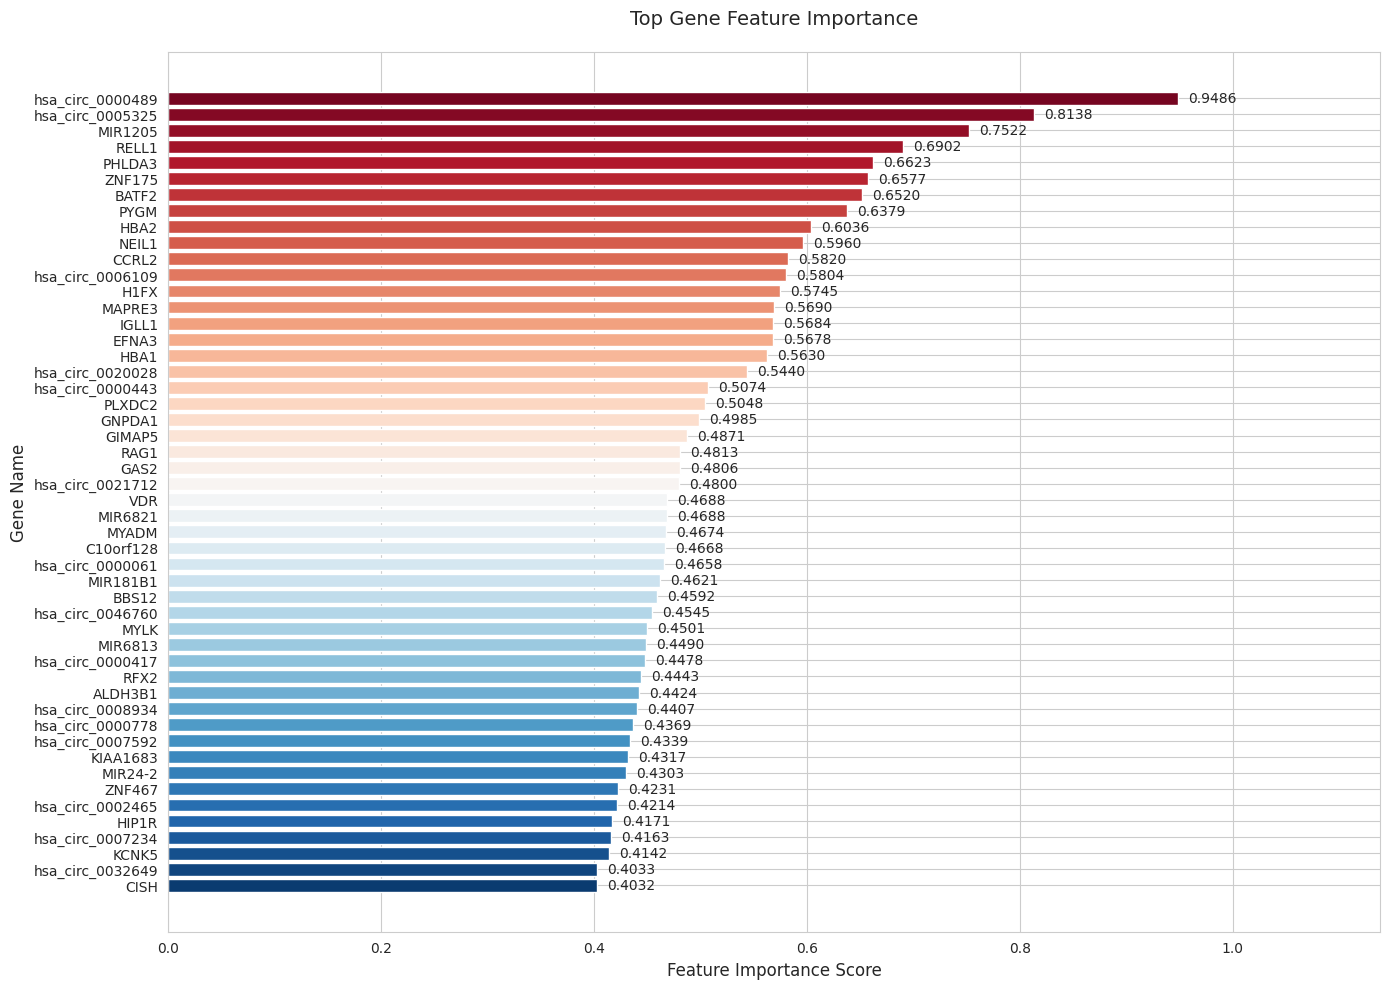

In [12]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes", save_file="plots/risk/mds_risk_feature_importances.png")

In [13]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 50
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [14]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(12), tensor(35.), tensor(28.))

1337


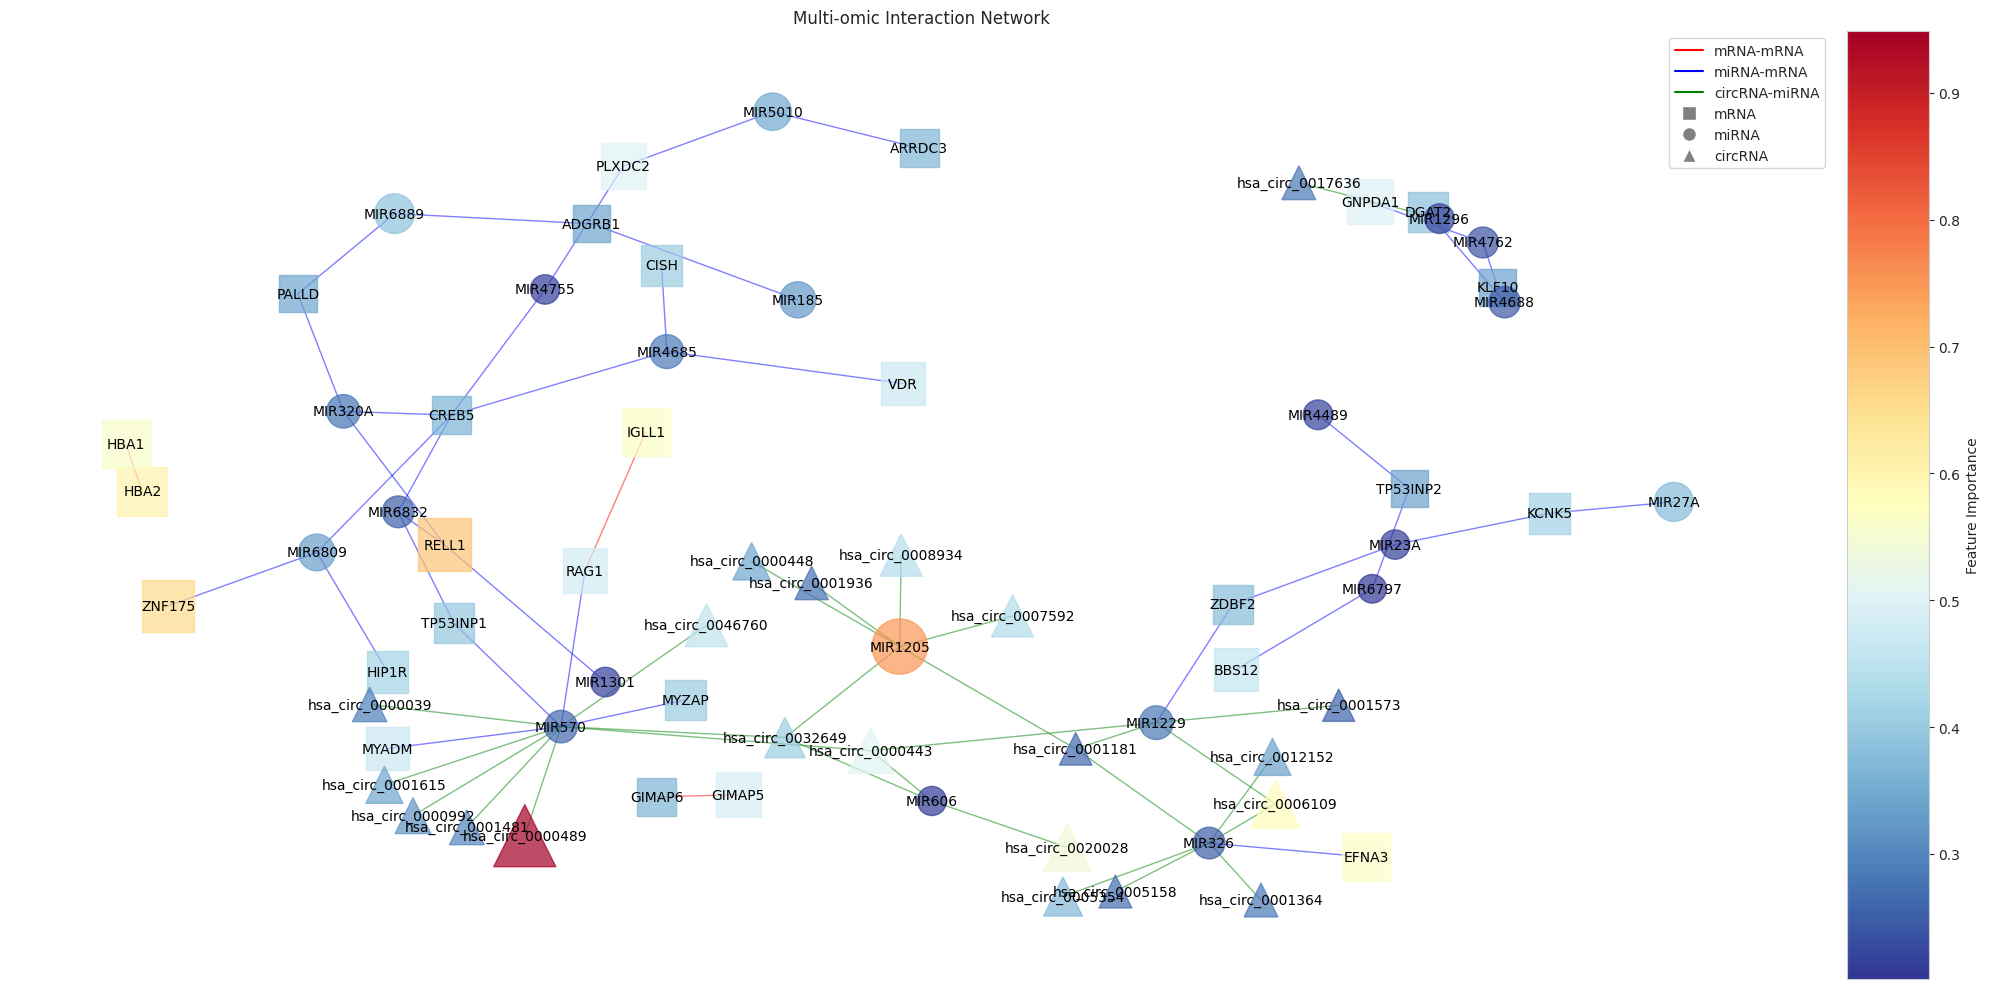

In [ ]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network
import numpy as np

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 # 1337
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(G, seed=seed, k=5, iterations=1000, scale=10)
# plt.show()
fig.savefig('plots/disease/disease_multi_omic_network.png', dpi=400)

- [MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)
- MIR1205 has been implicated to serve a function in other types of cancer https://www.nature.com/articles/s41419-019-2154-4, as a tumor suppressor in lung cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC6405972/, breast cancer https://www.sciencedirect.com/science/article/abs/pii/S0898656824002328, gastric cancer https://www.sciencedirect.com/science/article/pii/S2162253120301335
- has_circr_0000489 reported upregulated in liver cancer https://turkjgastroenterol.org/Content/files/sayilar/391/TJG_April_2023%20(1)-92-104.pdf
- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/), RELL1 identified as an oncogene in glioma cancer https://pubmed.ncbi.nlm.nih.gov/32683297/, RELT protein expression was detected in the spleen, lymph node, brain, breast and peripheral blood leukocytes (PBLs). A smaller than expected size of RELT was observed in PBLs, suggesting a proteolytically cleaved form of RELT.
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)
- hsa_circr_0005325 implicated to serve a function in cervical cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC9884480/, bladder cancer, and AML https://www.researchgate.net/publication/370139513_A_Bioinformatics_Analysis_of_circRNAmiRNAmRNA_Interactions_in_Acute_Myeloid_Leukemia